# **Live Code 3 Phase 1**

# **I. Perkenalan**

Nama : Muhammad Farhan Darmawan

Batch : RMT 019

## **Objective :**

Problem Statement :

Melakukan clustering kepada negara-negara yang akan dibantu oleh LSM

Latar Belakang :

Suatu lembaga LSM meng-hire anda sebagai data science freelance untuk membantu menentukan negara mana saja yang perlu dibantu berdasarkan data yang mereka miliki.

Kamu diminta untuk melakukan clustering dalam menentukan prioritas negara yang perlu diberikan bantuan

# **II. Import Libraries**

In [1]:
# Import library yang digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Preprocessing
from sklearn.impute import SimpleImputer #Outlier / Missing Value
from feature_engine.outliers import Winsorizer # Caping Missing Value
from sklearn.preprocessing import MinMaxScaler

# Correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model
# K-Means
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Evaluasi
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity

# Save Model
import joblib
import pickle
import json

import warnings
warnings.filterwarnings("ignore")

# **III. Data Loading**

In [2]:
# Me-loading data
data = pd.read_csv('humanitarian-aid.csv')
pd.set_option('display.max_columns', None)

In [3]:
# Menampilkan 10 data teratas
data.head(10)

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
# Menampilkan 10 data terbawah
data.tail(10)

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.50,76.5,1.87,35000
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.57,80.3,1.92,38900
159,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [5]:
# Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports          167 non-null    float64
 3   health           167 non-null    float64
 4   imports          167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   total_fertility  167 non-null    float64
 9   gdpp             167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Cek duplikasi data
data.duplicated(keep = False).sum()

0

In [7]:
# Menampilkan matrix data
data.shape

(167, 10)

# **IV. Exploratory Data Analysis**

In [8]:
# Copy dataframe
data_genuine = data.copy()

In [9]:
# Menghapus kolom 
data = data.drop(['country'], axis=1)

In [10]:
# Menampilkan informasi statistik pada data numerikal
data.describe()

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


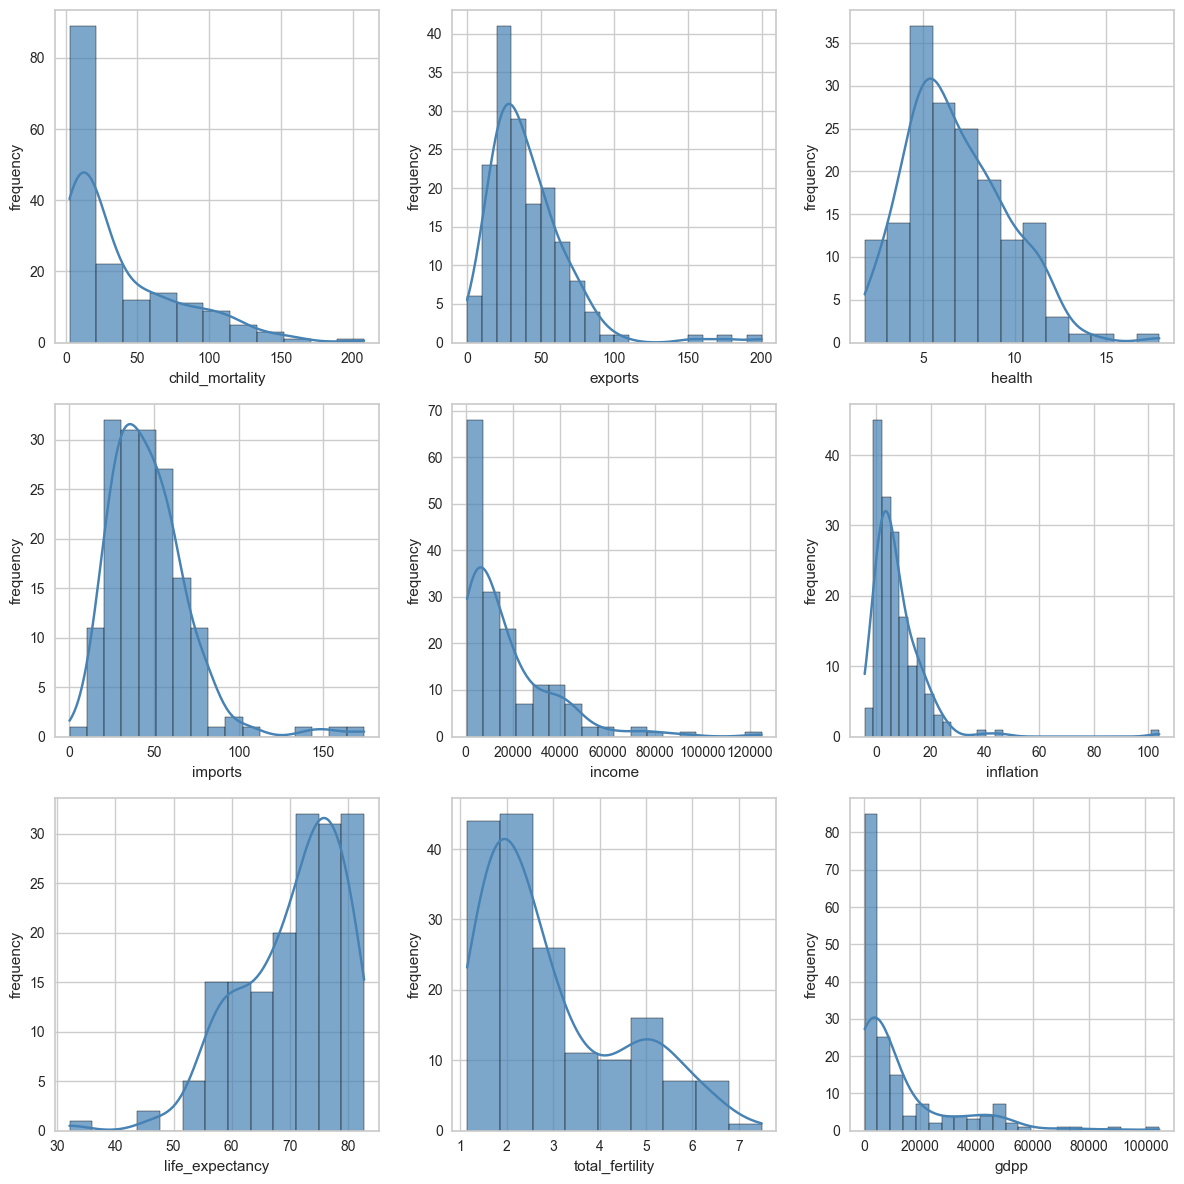

In [11]:
# Membuat subplot
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Mendapatkan daftar kolom dalam DataFrame
columns = data.columns

# Melakukan looping untuk membuat histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        # Membuat histogram
        sns.histplot(data=data, x=columns[i], kde=True, color='steelblue', alpha=0.7, ax=ax)
        ax.set_xlabel(columns[i])
        ax.set_ylabel('frequency')

# Menyusun tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

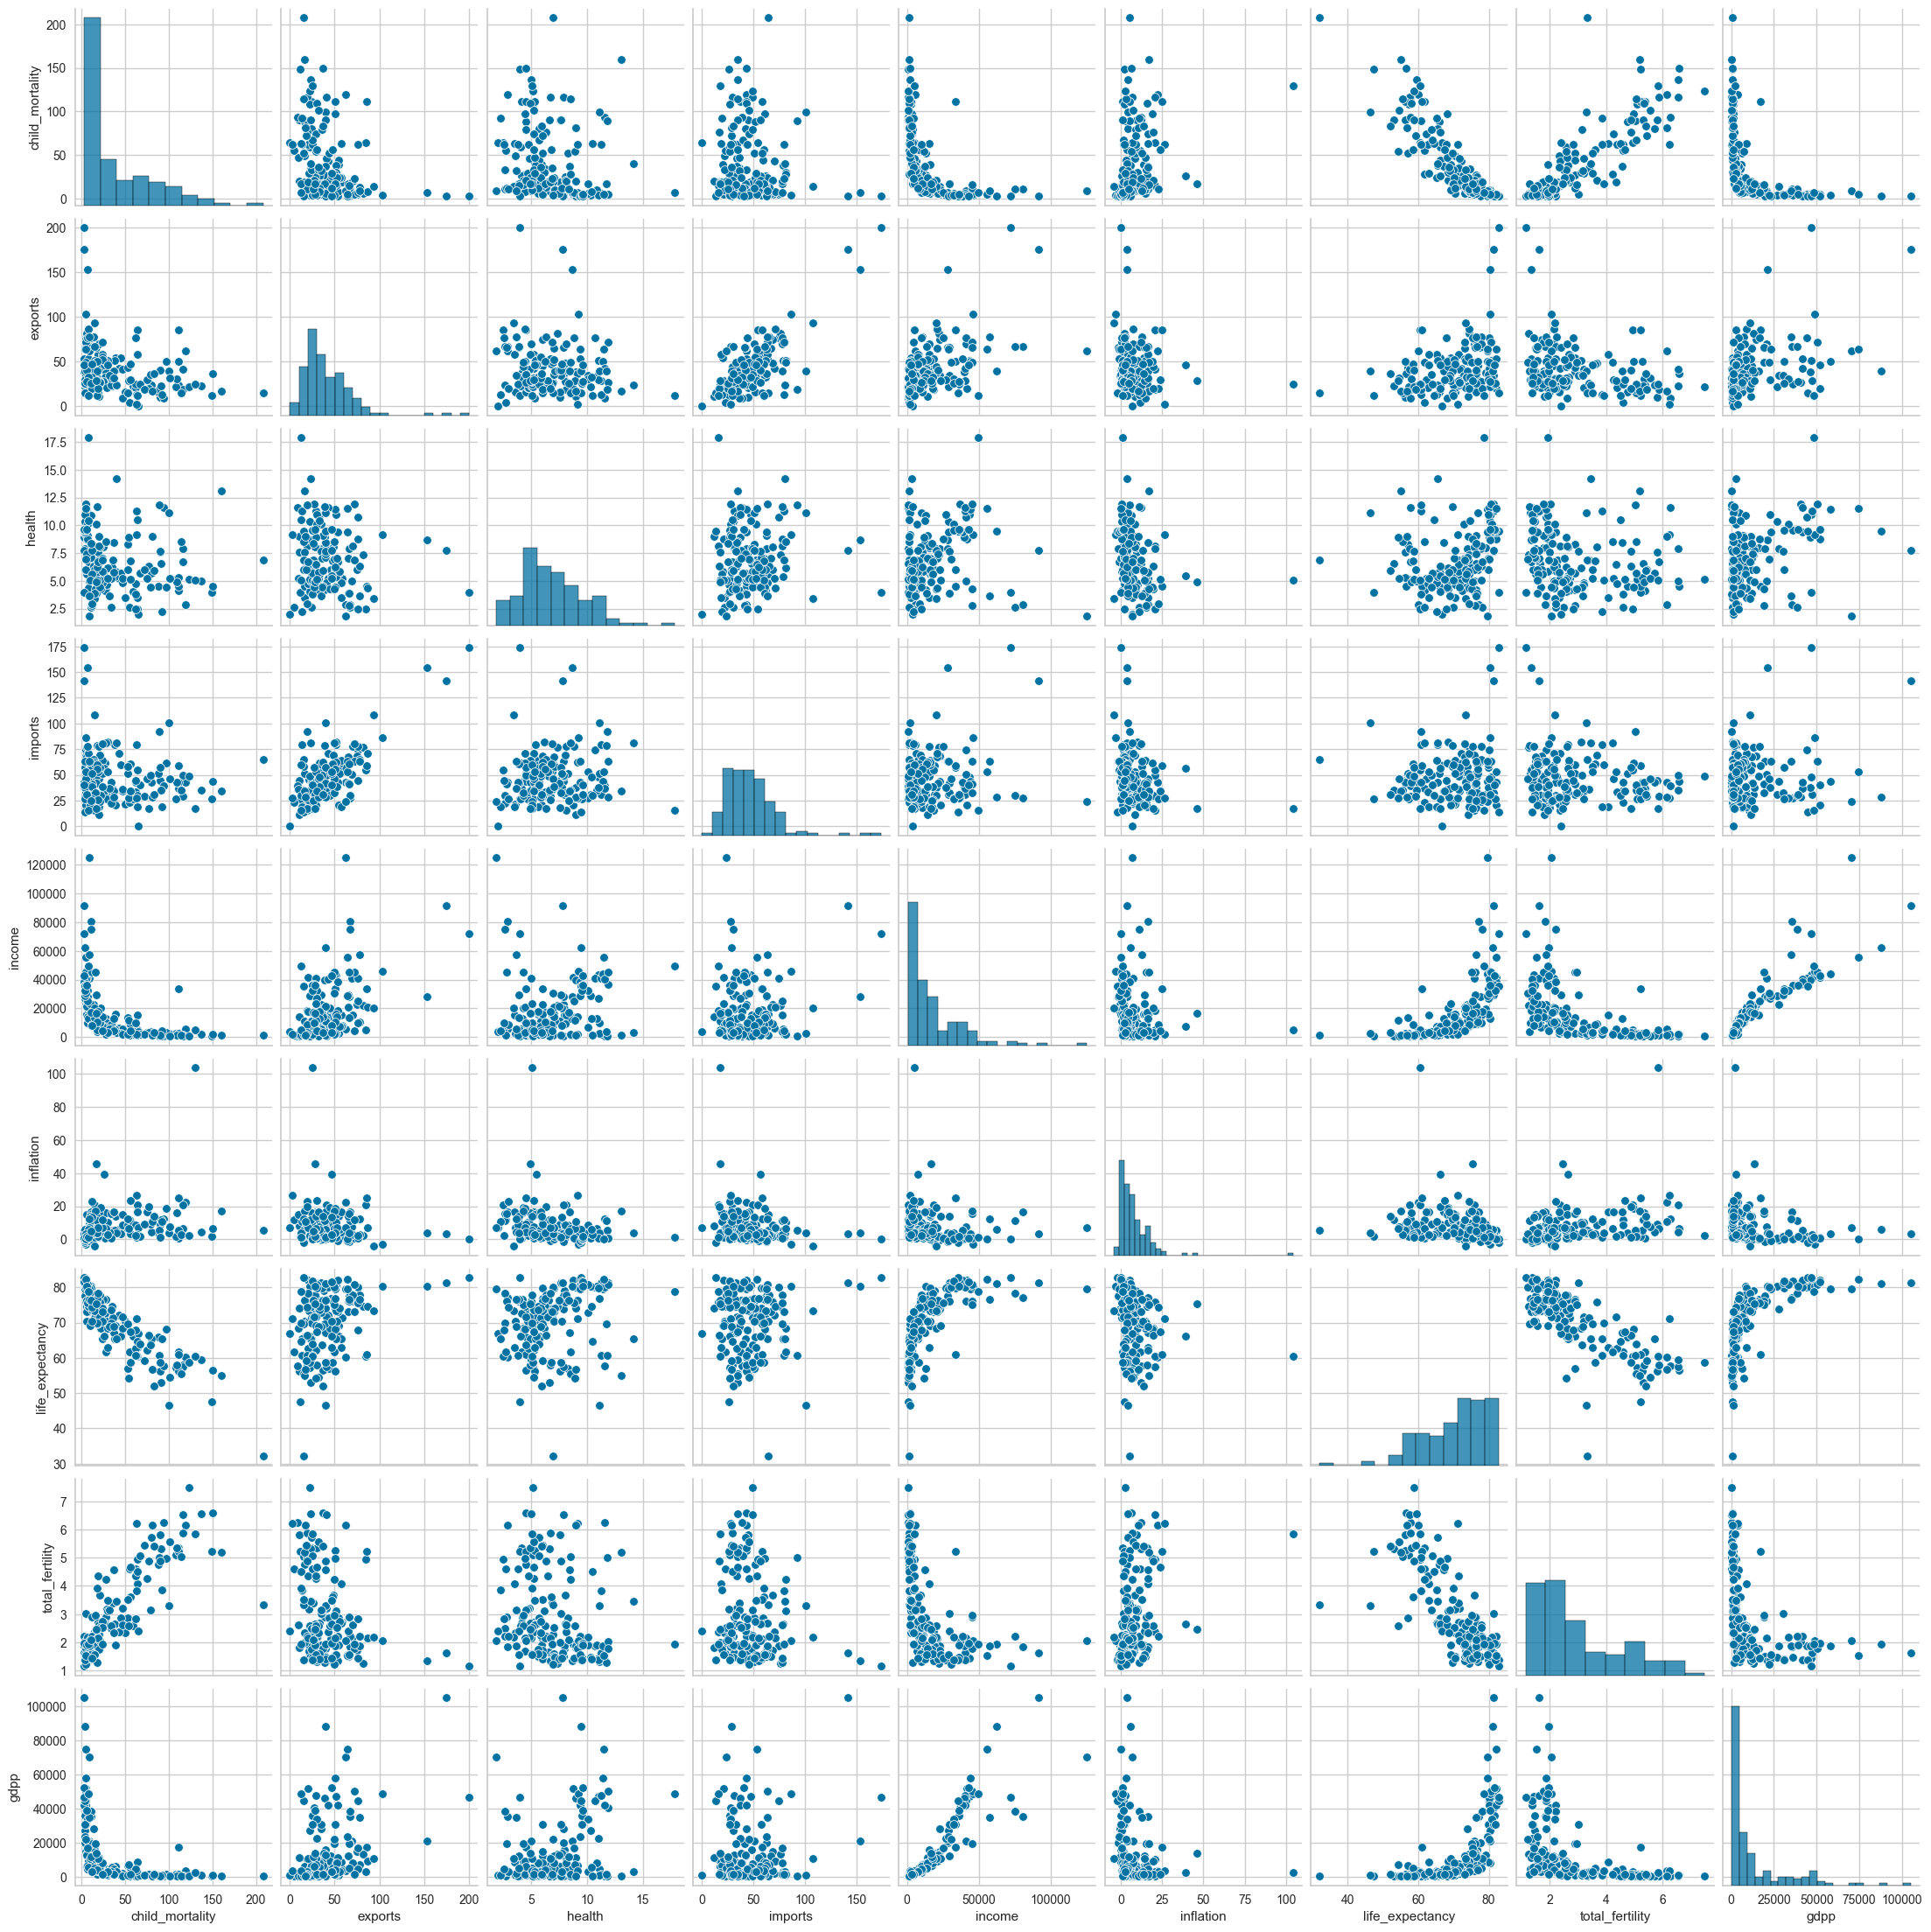

In [12]:
# Menampilkan scatterplot
sns.pairplot(data = data)

Statement :

- Dari 167 data tingkat kematian anak berkisar rendah-sedang, kegiatan export dan import yang tinggi, penghasilan yang cenderung rendah dengan inflasi sedang, dan GDP per capita yang rendah

- Berdasarkan grafik histogram, seluruh data terdistribusi tidak normal

- Berdasarkan scatterplot yang memiliki nilai korelasi yaitu:

    - child_mortality dengan life_expectancy dan total_fertility

    - income dengan gdpp

# **V. Feature Engineering**

## Handling Cardinality

Pada dataset ini tidak dilakukan handling cardinality

## Handling Missing Values

In [13]:
# Check Missing Value
data.isnull().sum()

child_mortality    0
exports            0
health             0
imports            0
income             0
inflation          0
life_expectancy    0
total_fertility    0
gdpp               0
dtype: int64

Pada dataset tidak ada missing value

## Handling Outlier

### Grafik Histogram dan Boxplot

In [14]:
def diagnostic_plots(df):
    num_cols = len(df.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4*num_rows))
    
    for i, column in enumerate(df.columns):
        row = i // 2
        col = i % 2
        
        ax = axes[row, col]
        sns.boxplot(df[column], ax=ax)
        ax.set_title('Boxplot of ' + column)
        
        skewness = df[column].skew()
        ax.text(0.5, 0.95, f'Skewness: {skewness:.2f}', transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='top',
                bbox={'boxstyle': 'round', 'facecolor': 'white', 'alpha': 0.8})
    
    plt.tight_layout()
    plt.show()


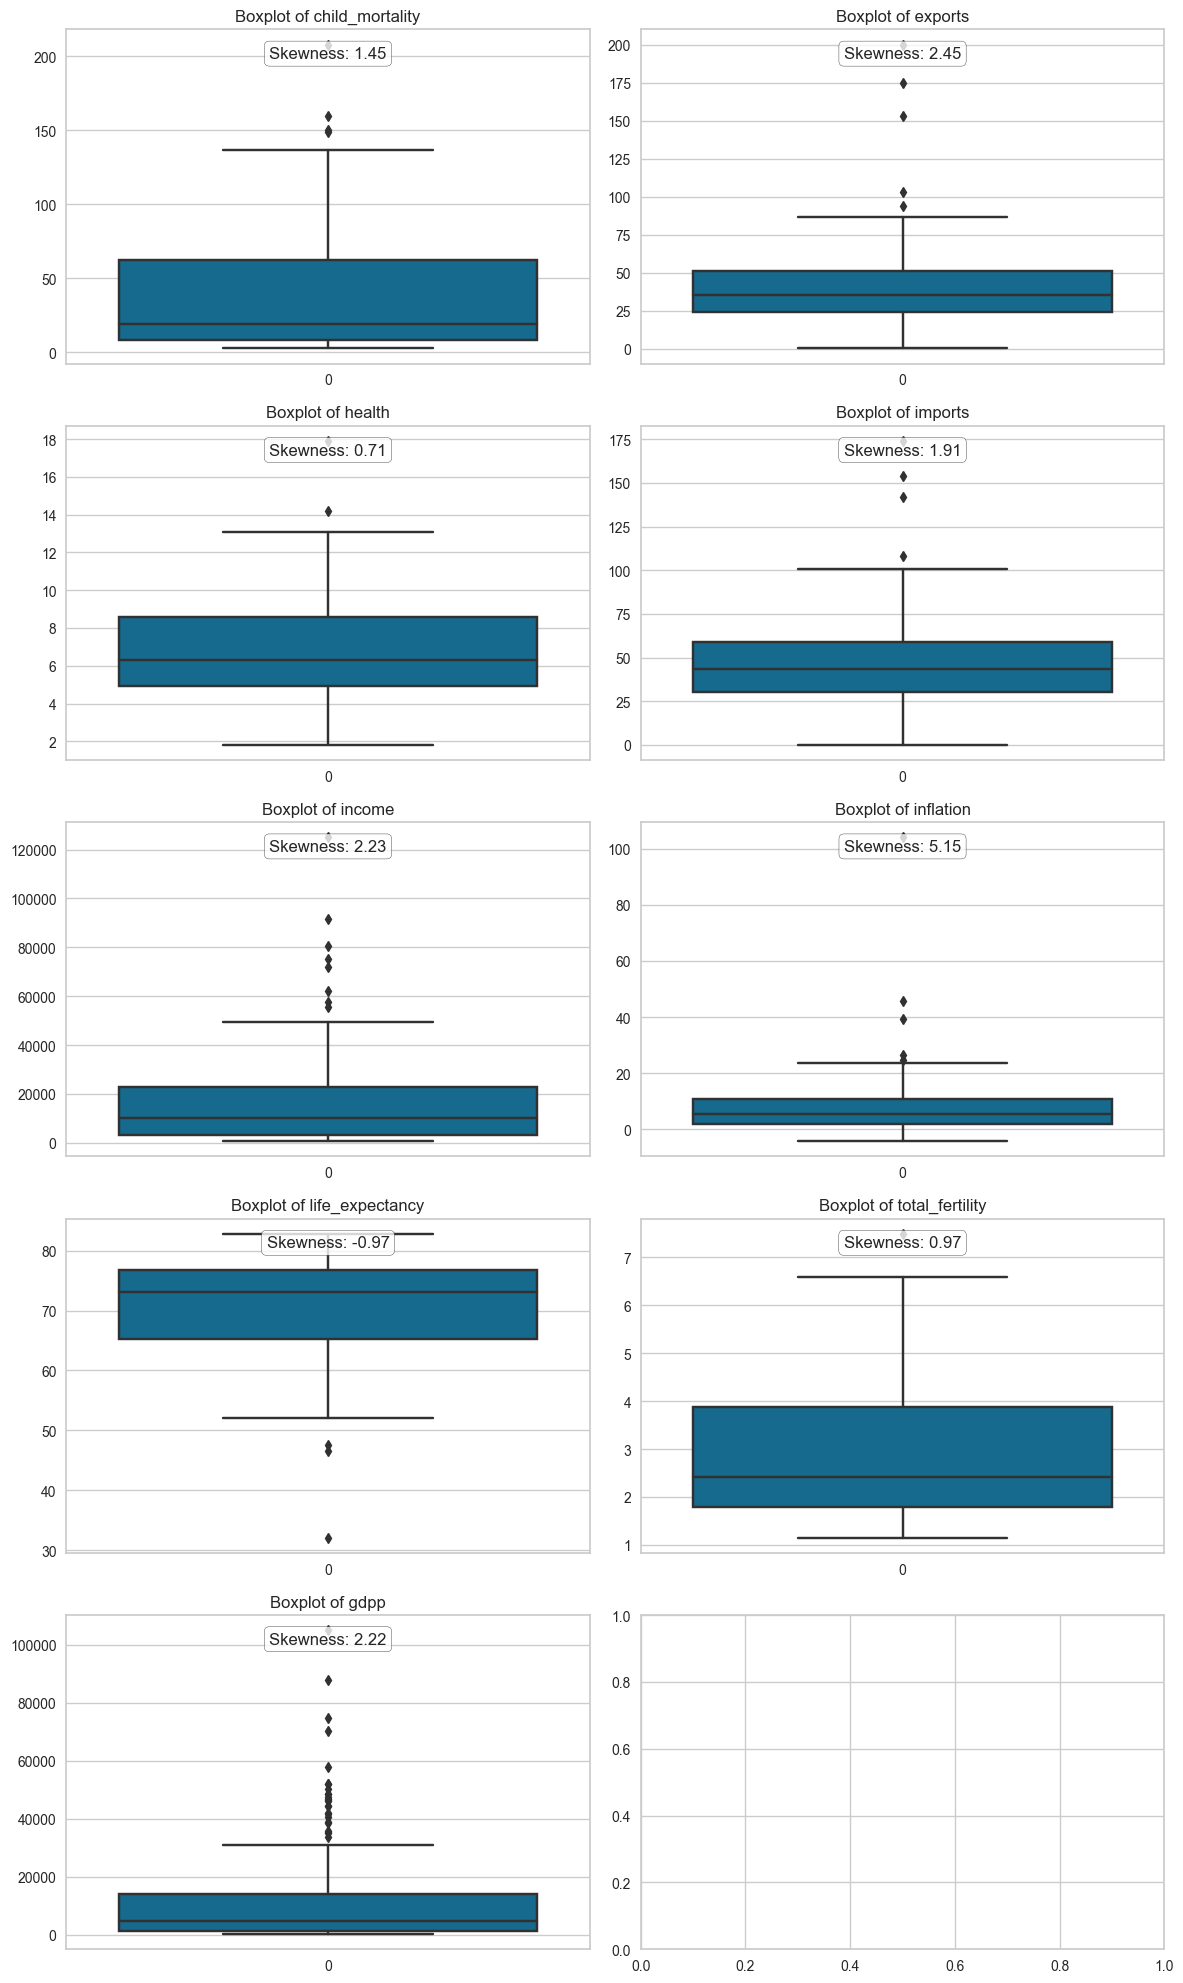

In [15]:
# Menampilkan grafik histogram dan boxplot
diagnostic_plots(data)

### Capping Outlier

Secara personal saya akan menggunakan cara capping karena dari seluruh data nilai outlier termasuk kedalam `natural outlier`

In [16]:
data.columns.tolist()

['child_mortality',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expectancy',
 'total_fertility',
 'gdpp']

In [17]:
# Membuat capper pada data train
windsoriser = Winsorizer(capping_method='iqr',
                         tail='both',
                         fold=1.5,
                         variables=(['child_mortality', 'exports', 'health', 'imports', 
                                     'income', 'inflation', 'life_expectancy', 'total_fertility', 
                                     'gdpp'])
                         )

windsoriser.fit(data)
data_t = windsoriser.transform(data)

In [18]:
# Menampilkan nilai minimum dari tiap kolom
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Menampilkan nilai maximum dari tiap kolom
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'child_mortality': -72.525, 'exports': -17.524999999999988, 'health': -0.6000000000000023, 'imports': -12.625000000000004, 'income': -25812.5, 'inflation': -11.6, 'life_expectancy': 48.05, 'total_fertility': -1.3325, 'gdpp': -17750.0}
Right Tail Caps :  {'child_mortality': 142.875, 'exports': 92.67499999999998, 'health': 14.120000000000005, 'imports': 101.575, 'income': 51967.5, 'inflation': 24.16, 'life_expectancy': 94.05, 'total_fertility': 7.0075, 'gdpp': 33130.0}


## Feature Scaling

Dikarenakan distribusi nya tidak normal, maka `feature scaling` menggunakan `MinMaxScaler`

In [19]:
scaler = MinMaxScaler() # Menggunakan syntax MinMaxScaler()
scaler.fit(data_t) # Melatih data train

data_sc_scaled = scaler.transform(data_t) 

In [20]:
# Menampilkan dataframe yang sudah di scaling pada data Train
data_sc_scaled = pd.DataFrame(data_sc_scaled, columns = data.columns.tolist())
data_sc_scaled


,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,0.624488,0.106853,0.468725,0.441676,0.019490,0.481142,0.234532,0.797268,0.009788
1,0.099804,0.301309,0.385053,0.478126,0.181489,0.306662,0.812950,0.085361,0.117298
2,0.176083,0.413662,0.191714,0.308683,0.239318,0.715897,0.818705,0.297055,0.128545
3,0.829799,0.671856,0.084484,0.421973,0.103021,0.937963,0.346763,0.855314,0.100277
4,0.054892,0.490364,0.342811,0.579594,0.360038,0.199154,0.827338,0.167307,0.363810
...,...,...,...,...,...,...,...,...,...
162,0.189628,0.502247,0.279448,0.518516,0.045582,0.240747,0.430216,0.401195,0.083255
163,0.103368,0.306711,0.251828,0.172734,0.309413,1.000000,0.787050,0.225352,0.403325
164,0.147567,0.776646,0.408611,0.789428,0.075567,0.574903,0.720863,0.136577,0.032797
165,0.382819,0.322916,0.273761,0.338237,0.075372,0.980261,0.559712,0.600939,0.032797


## Feature Enconding

Untuk feature encoding tidak saya lakukan karena data sudah termasuk numeric category

## Checking Multicolinearity

#### Multicollinearity

In [21]:
# Membuat function untuk menghitung nilai VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = data_sc_scaled.columns
    vif["VIF"] = [variance_inflation_factor(data_sc_scaled.values, i) for i in range(data_sc_scaled.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [22]:
# Menampilkan nilai VIF
calc_vif(data_sc_scaled)

,variables,VIF
4,income,35.897117
8,gdpp,29.805776
3,imports,15.745275
1,exports,15.676792
6,life_expectancy,12.556148
7,total_fertility,11.394579
0,child_mortality,9.520855
2,health,7.106818
5,inflation,5.667853


Jika dilihat dari nilai variance inflation factor bahwa seluruh kolom tidak memerlukan reduksi

# **VI. Model Definition**

Pada Clustering menggunakan Model K-means dengan metode Elbow dan Silhouette

# **VII. Model Training**

## PCA

In [23]:
# Membuat dataframe hanya tipe numerikal
data_use = data_sc_scaled.copy()
data_use.shape

(167, 9)

In [24]:
# Melakukan fit pada data_use
pca = PCA()
pca.fit(data_use)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

5

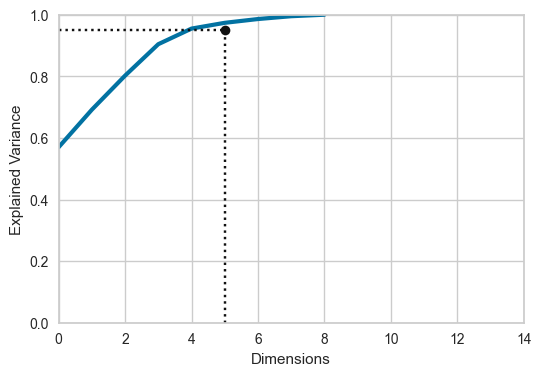

In [25]:
# Menampilkan grafik EVR
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

In [26]:
# Memanggil dan melatih data menggunakan PCA
pca5 = PCA(n_components=5)
data_reduce = pca5.fit_transform(data_use)

In [27]:
# Mengetahui jumlah komponen 
pca5.n_components_

5

In [28]:
# Mengetahui persentase representative
np.sum(pca5.explained_variance_ratio_)

0.9549817412643082

## K-Means

### Elbow Method

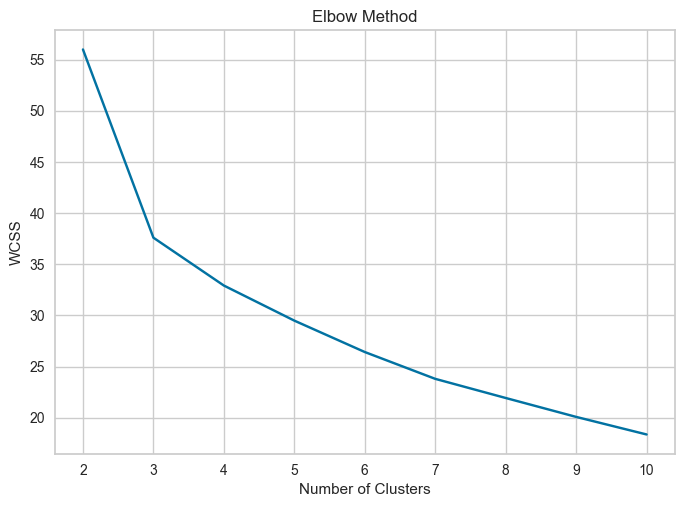

In [29]:
# Mencari nilai cluster menggunakan elbow method
kme_model = [KMeans(n_clusters=k, init= 'k-means++', max_iter= 300, n_init=10, random_state=23).fit(data_reduce) for k in range (2,11)]
inertia = [model.inertia_ for model in kme_model]

plt.plot(range(2,11), inertia)
plt.title('Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

Dari Elbow Method bisa dilihat bahwa rekomendasi kluster yaitu 6 atau 7

### Silhouette Score

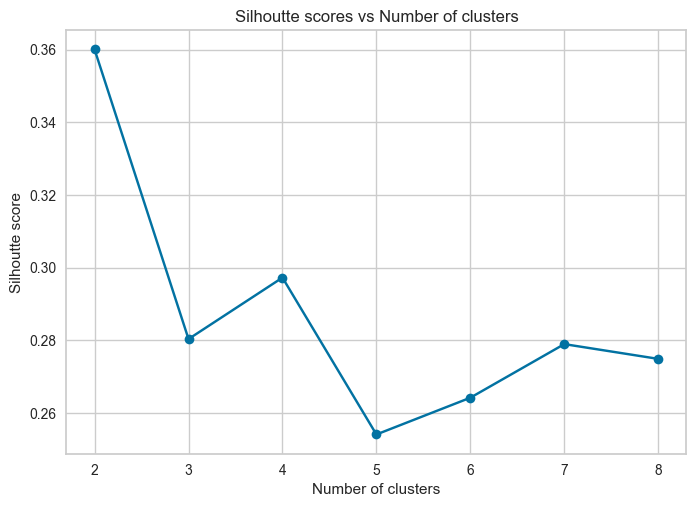

In [30]:
# Menampilkan grafik silhouette
kms_model = [silhouette_score(data_reduce, model.labels_) for model in kme_model[1:8]]
plt.plot(range(2,9), kms_model, "bo-")
plt.xticks([2, 3, 4, 5, 6, 7, 8])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

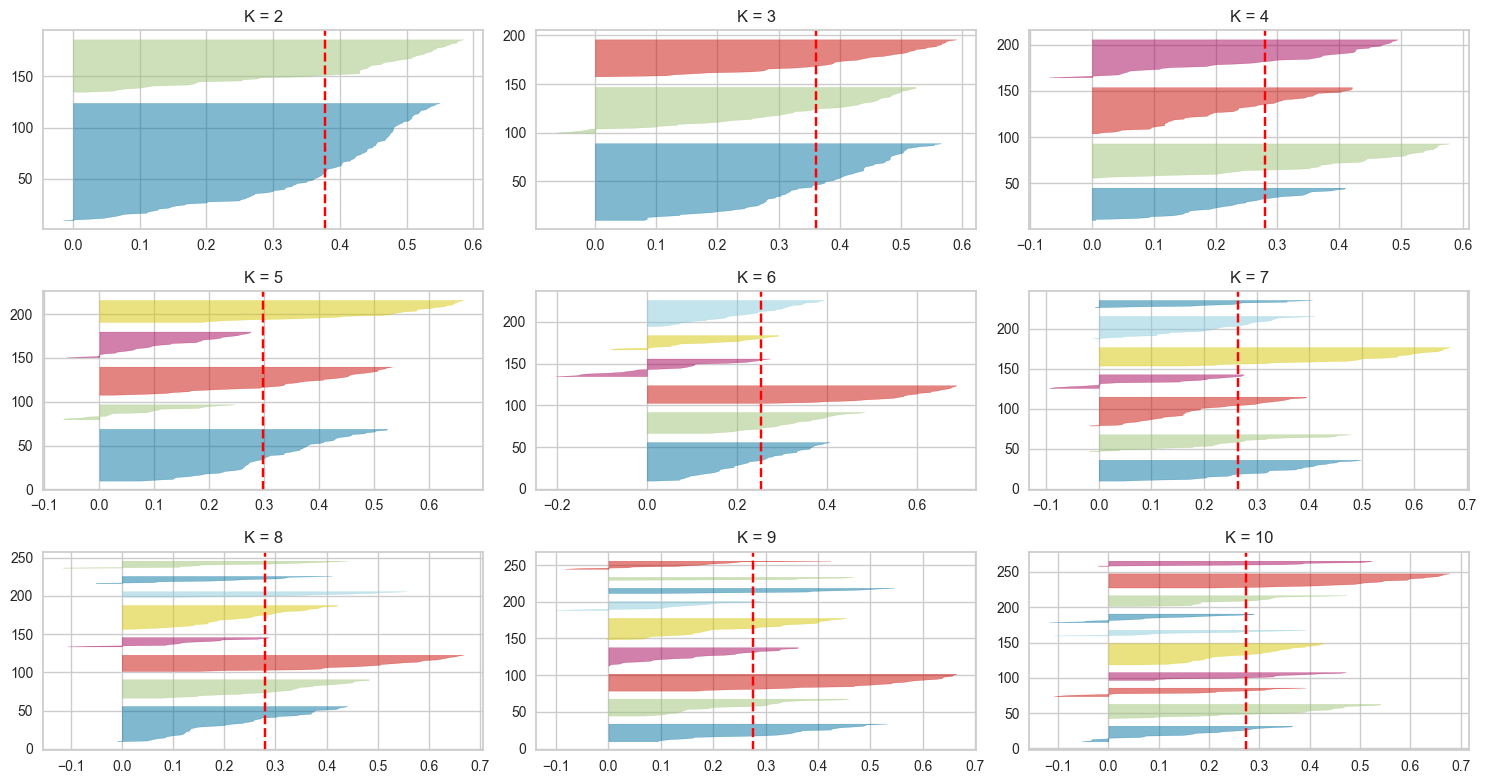

In [31]:
# Menampilkan silhouette visualizer
# Set up subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    
    # Set jumlah cluster
    n_clusters = i + 2
    
    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 300, random_state = 23)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
    
    # Fit visualizer ke data x
    visualizer.fit(data_reduce)
    
    # Set title
    ax.set_title(f'K = {n_clusters}')
    
# Adjust layout
plt.tight_layout()
plt.show()

Dari visualizer diatas dapat dilihat bahwa rekomendasi kluster yaitu 4 karena distribusi datanya relatif hampir sama

# **VIII. Model Evaluation**

In [32]:
# Melakukan training data dengan cluster 4
kmeans = KMeans(n_clusters=3, init= 'k-means++', max_iter= 300, n_init=10, random_state=23)
kmeans.fit_predict(data_reduce)

print('Silhoutte score of our model is ' + str(silhouette_score(data_reduce, kmeans.labels_)))

Silhoutte score of our model is 0.3600319376896289


In [33]:
# Membuat kolom cluster_id
data_use['cluster_id'] = kmeans.labels_

In [34]:
# Menampilkan unique values
data_use.cluster_id.unique().tolist()

[1, 0, 2]

In [35]:
# Menampilkan 5 data teratas
data_use.head()

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,cluster_id
0,0.624488,0.106853,0.468725,0.441676,0.019490,0.481142,0.234532,0.797268,0.009788,1
1,0.099804,0.301309,0.385053,0.478126,0.181489,0.306662,0.812950,0.085361,0.117298,0
2,0.176083,0.413662,0.191714,0.308683,0.239318,0.715897,0.818705,0.297055,0.128545,0
3,0.829799,0.671856,0.084484,0.421973,0.103021,0.937963,0.346763,0.855314,0.100277,1
4,0.054892,0.490364,0.342811,0.579594,0.360038,0.199154,0.827338,0.167307,0.363810,0


## Interpretation / EDA

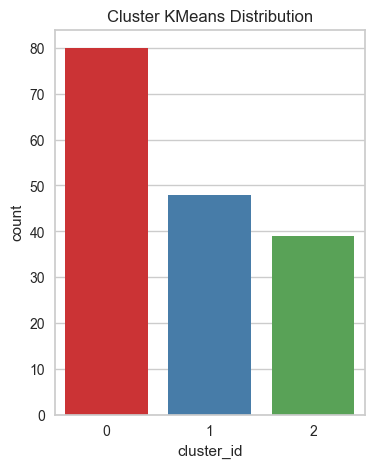

In [36]:
# visualisai berdasarkan cluster_id

plt.figure(figsize=(4, 5))
sns.countplot(data=data_use, x='cluster_id', palette='Set1')
plt.title('Cluster KMeans Distribution')
plt.show()

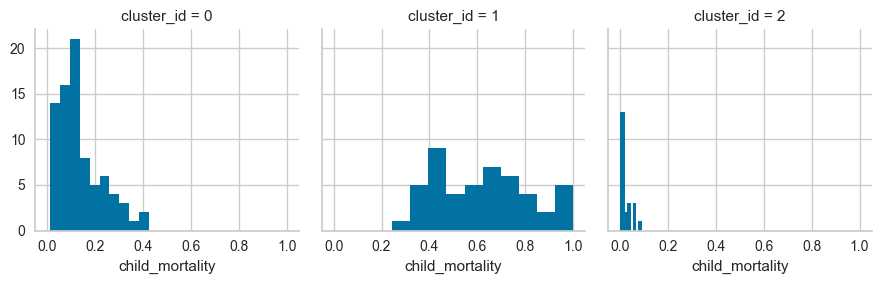

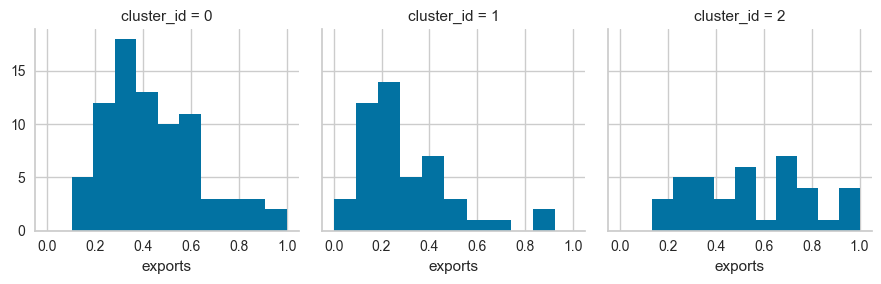

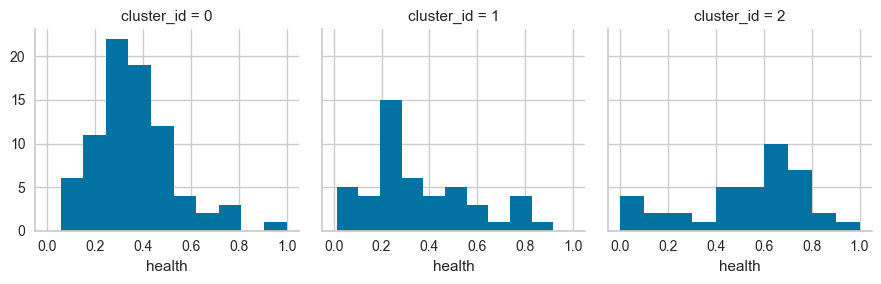

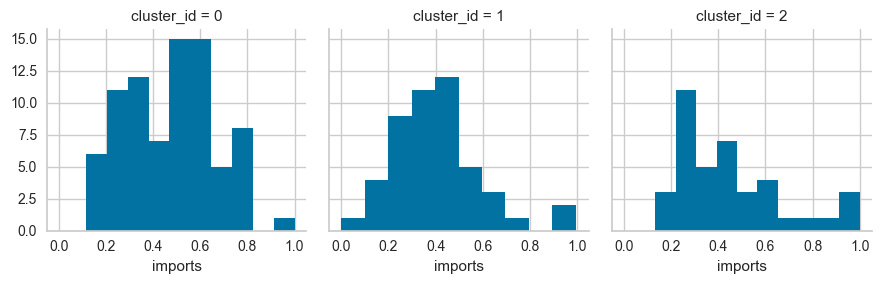

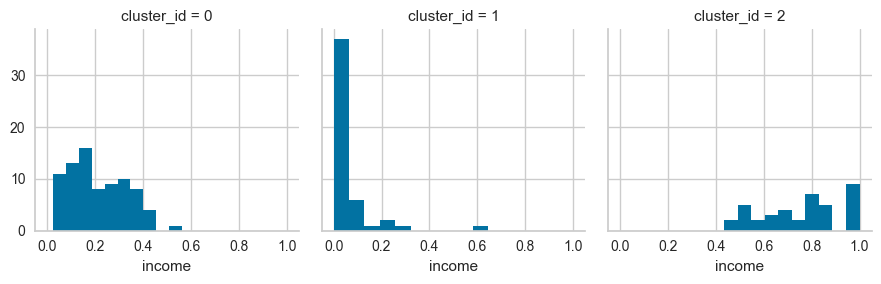

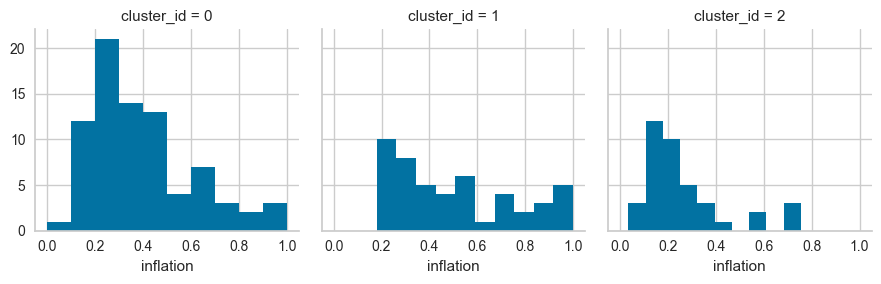

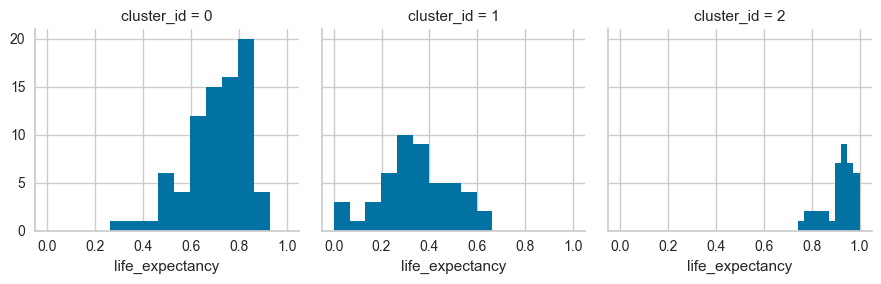

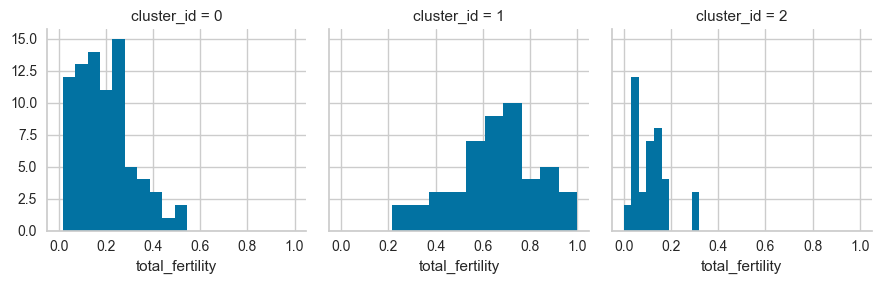

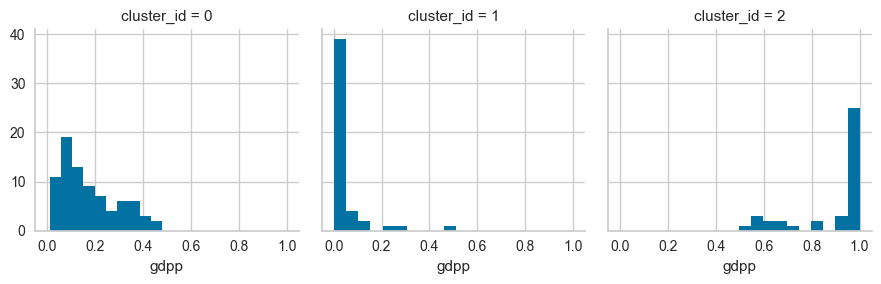

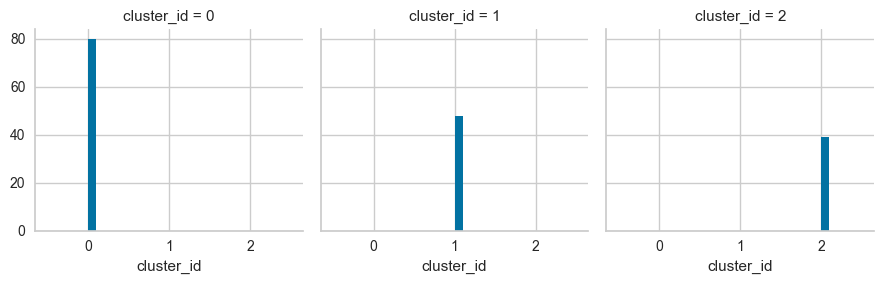

In [37]:
# Menampilkan characteristic dari tiap cluster
for c in data_use.columns:
    grid= sns.FacetGrid(data_use, col='cluster_id')
    grid.map(plt.hist, c)

In [38]:
# Membuat kolom cluster_id
data_genuine['cluster_id'] = kmeans.labels_

In [39]:
data_country = data_genuine.loc[:,['country', 'cluster_id']]

In [40]:
# Menampilkan negara yang termasuk kedalam cluster kurang makmur
data_country[data_country['cluster_id'] == 1]

,country,cluster_id
0,Afghanistan,1
3,Angola,1
17,Benin,1
25,Burkina Faso,1
26,Burundi,1
28,Cameroon,1
31,Central African Republic,1
32,Chad,1
36,Comoros,1
37,"Congo, Dem. Rep.",1


Statement :

- Cluster terbanyak yaitu cluster 0, disusul oleh cluster 1, dan terakhir cluster 1

- Cluster 0 : Negara Cukup Makmur (low-mid child mortality, mid spending for health, low-mid income,mid-high inflation, low-mid gdpp)

- Cluster 1 : Negara Kurang Makmur (mid-high child mortality, mid spending for health, low income, mid-high inflation, low gdpp)

- Cluster 2 : Negara Makmur (low child mortality, mid spending for health, high income, mid-low inflation, high gdpp)

## 2D Model

In [41]:
# Copy dataframe
X = data_sc_scaled.copy()

In [42]:
# Mereduksi komponen menjadi 2
dist = 1 - cosine_similarity(X)

pca2 = PCA(2)
pca2.fit(dist)
X_PCA2 = pca2.transform(dist)
X_PCA2.shape

(167, 2)

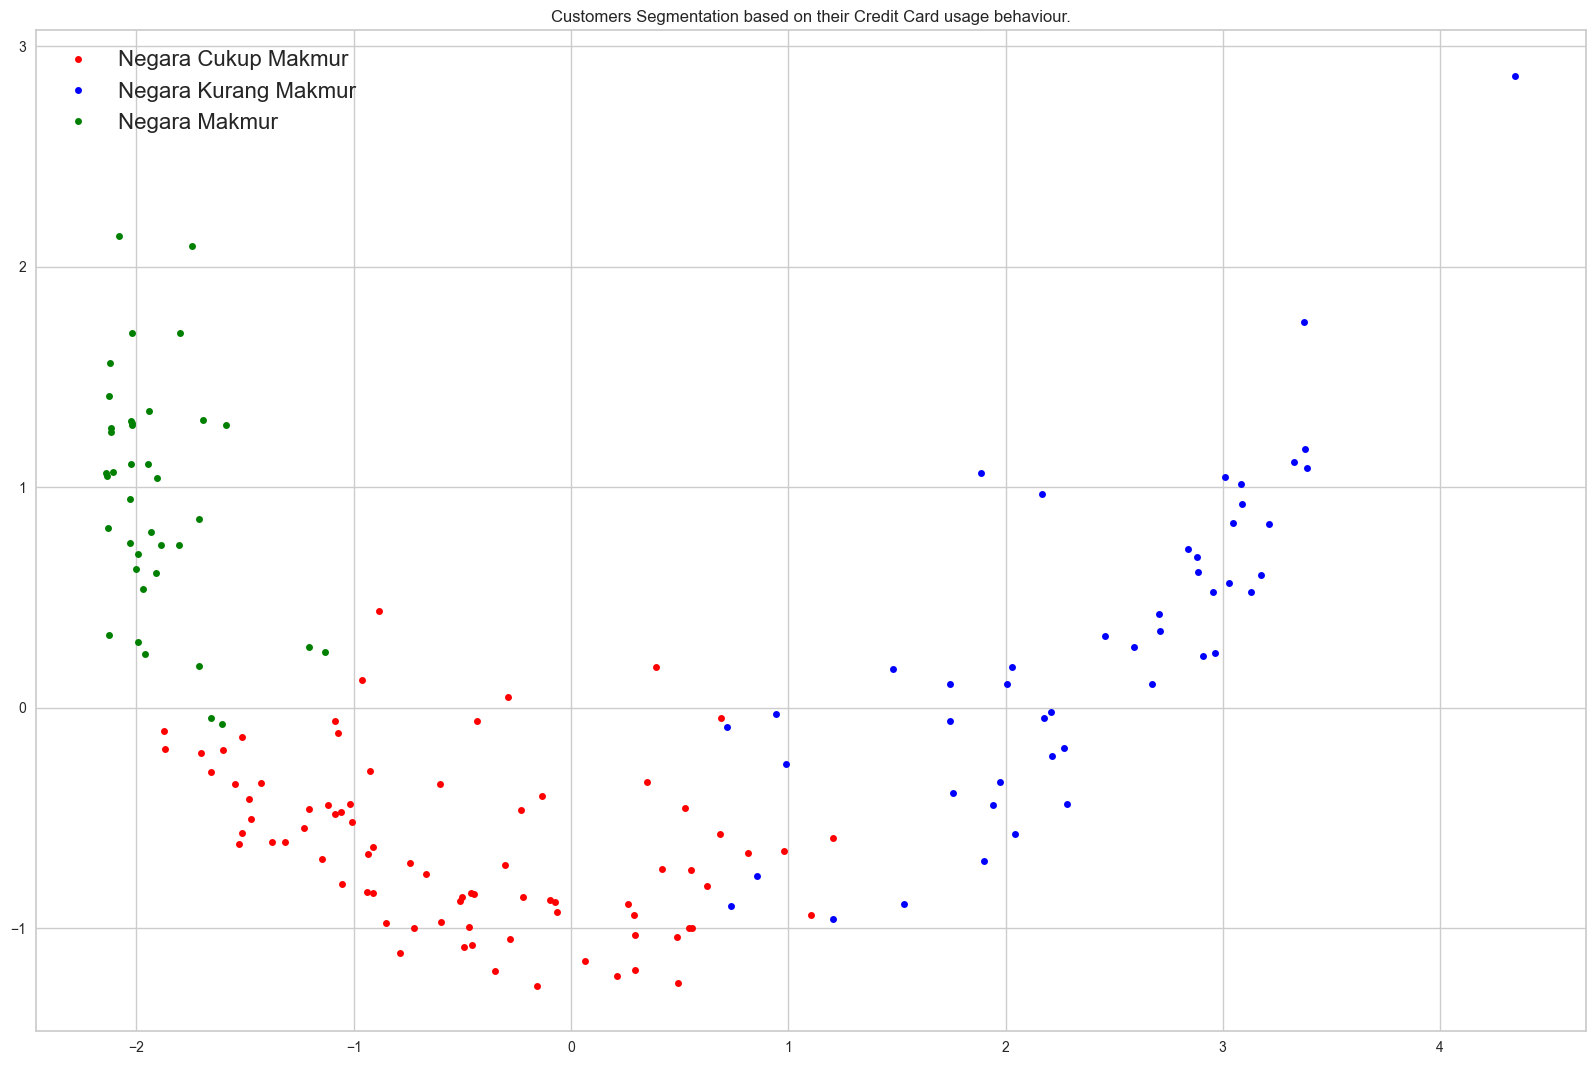

In [44]:
# Menampilkan grafik 2D scatterplot
x, y = X_PCA2[:, 0], X_PCA2[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green'}

names = {0: 'Negara Cukup Makmur', 
         1: 'Negara Kurang Makmur', 
         2: 'Negara Makmur'}
  
df = pd.DataFrame({'x': x, 'y':y, 'clusters':kmeans.labels_}) 
groups = df.groupby('clusters')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend(fontsize=16)
ax.set_title("Customers Segmentation based on their Credit Card usage behaviour.")
plt.show()

Statement :

- Saya mereduksi kolom menjadi 5 komponen karena merepresentasikan sebesar 95%

- Dalam menentukan cluster saya menggunakan silhouette score karena lebih presisi dibandingkan dengan elbow method, selain itu saya membagi kedalam 3 cluster karena memiliki nilai silhouette score yang cukup tinggi dan berdasarkan silhouette visualizer cluster dengan nilai 3 memiliki persebaran data yang cukup merata di masing masing clusternya

- Diketahui dari jumlah populasi cluster bahwa masih banyak negara yang termasuk kedalam negara cukup makmur dan kurang makmur

Insight :

- Cluster 0 merupakan negara yang berkecukupan. **LSM dapat menjadikan negara ini sebagai negara yang perlu dibantu namun belum menjadi prioritas**

- Cluster 1 merupakan negara yang kurang makmur. **LSM dapat menjadikan negara ini sebagai prioritas untuk diberikan bantuan**

- Cluster 2 merupakan negara yang makmur. **LSM tidak perlu mencemaskan negara pada cluster ini**

# **IX. Model Saving**

In [ ]:
# Save File

# Modelling
with open('kmeans.pkl', 'wb') as file_1:
    pickle.dump(kmeans, file_1)


# Pre-processing

with open('scale_feat.pkl', 'wb') as file_2:
    pickle.dump(scaler, file_2  )

with open('winsoriser.pkl', 'wb') as file_3:
    pickle.dump(windsoriser, file_3)

# **X. Model Inference**

## Load Model

In [ ]:
# Load Model

# Modelling
with open('kmeans.pkl', 'rb') as file_1:
    kmeans4 = pickle.load(file_1)


# Pre-processing

with open('scale_feat.pkl', 'rb') as file_2:
    scale_feat = pickle.load(file_2)

with open('winsoriser.pkl', 'rb') as file_3:
    winsoriser = pickle.load(file_3)

## Inferencing

In [ ]:
df_inf = data.sample(n=50)
df_inf

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
117,19.7,70.00,8.10,78.2,15400,2.590,77.8,2.62,8080
69,58.8,22.60,4.05,27.1,4410,8.980,66.2,2.60,1350
2,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
122,3.9,29.90,11.00,37.4,27200,0.643,79.8,1.39,22500
12,49.4,16.00,3.52,21.8,2440,7.140,70.4,2.33,758
165,56.3,30.00,5.18,34.4,4480,23.600,67.5,4.67,1310
57,16.5,35.00,10.10,52.8,6730,8.550,72.8,1.92,2960
137,53.7,28.60,8.94,27.4,12000,6.350,54.3,2.59,7280
4,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
96,13.2,77.60,6.33,65.4,10500,2.880,77.9,2.23,7100


In [ ]:
# Check missing value
df_inf.isnull().sum()

child_mortality    0
exports            0
health             0
imports            0
income             0
inflation          0
life_expectancy    0
total_fertility    0
gdpp               0
dtype: int64

Handling Outlier

In [ ]:
df_inf_t = winsoriser.transform(df_inf)

Scaling

In [ ]:
# Splitting data
df_inf_sc = df_inf_t

In [ ]:
df_inf_sc = scale_feat.transform(df_inf_sc)

In [ ]:
# Mengubah menjadi dataframe
df_inf_sc = pd.DataFrame(df_inf_sc, columns = df_inf.columns.tolist())

Modeling

In [ ]:
# Memanggil dan melatih data menggunakan PCA
pca = PCA(n_components=5)
df_reduce = pca.fit_transform(df_inf_sc)

In [ ]:
cluster_predict = kmeans4.predict(df_reduce)
cluster_predict

array([2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2,
       1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 2,
       2, 0, 0, 2, 0, 1])

In [ ]:
# Menambah kolom cluster
df_inf_sc['cluster'] = cluster_predict

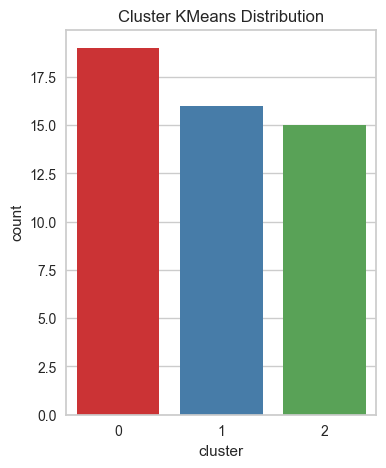

In [ ]:
# visualisai berdasarkan cluster_id

plt.figure(figsize=(4, 5))
sns.countplot(data=df_inf_sc, x='cluster', palette='Set1')
plt.title('Cluster KMeans Distribution')
plt.show()

# **XI. Kesimpulan**

Exploratory Data Analysis :

- Dari 167 data tingkat kematian anak berkisar rendah-sedang, kegiatan export dan import yang tinggi, penghasilan yang cenderung rendah dengan inflasi sedang, dan GDP per capita yang rendah

- Berdasarkan grafik histogram, seluruh data terdistribusi tidak normal

- Berdasarkan scatterplot yang memiliki nilai korelasi yaitu:

    - child_mortality dengan life_expectancy dan total_fertility

    - income dengan gdpp

Model Analysis :

- Saya mereduksi kolom menjadi 5 komponen karena merepresentasikan sebesar 95%

- Dalam menentukan cluster saya menggunakan silhouette score karena lebih presisi dibandingkan dengan elbow method, selain itu saya membagi kedalam 3 cluster karena memiliki nilai silhouette score yang cukup tinggi dan berdasarkan silhouette visualizer cluster dengan nilai 3 memiliki persebaran data yang cukup merata di masing masing clusternya

- Diketahui dari jumlah populasi cluster bahwa masih banyak negara yang termasuk kedalam negara cukup makmur dan kurang makmur

Insight :

- Cluster 0 merupakan negara yang berkecukupan. **LSM dapat menjadikan negara ini sebagai negara yang perlu dibantu namun belum menjadi prioritas**

- Cluster 1 merupakan negara yang kurang makmur. **LSM dapat menjadikan negara ini sebagai prioritas untuk diberikan bantuan**

- Cluster 2 merupakan negara yang makmur. **LSM tidak perlu mencemaskan negara pada cluster ini**